Using the same function as before:
u' = cu + sin(t)

In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
c = 1
## ^ for posterity

def F(t):
    # our non linear component
    return np.sin(t)

def timestep(u_n, I, h):
    # u_n is the previous time step
    # I is the integral of the non linear part
    # h is out time step width
    return u_n*np.exp(c*h) + I

#Now using the rk4 method
def I_RK4(t,h):
    f1 = F(t)
    f2 = F(t + h/2)
    f3 = F(t + h/2)
    #Note: because our function F is not dependent on U our f2 = f3
    #      normally f2 = F(u_n + f1*h, t+h/2) , f3 = F(u_n + f2*h, t+h/2)
    f4 = F(t+h)

    part1 = f1*(-4 -h*c +np.exp(c*h)*(4 -3*h*c +(h*c)**2))

    part2 = 2*(f2 + f3)*(2 +h*c +np.exp(c*h)*(-2 +h*c))

    part3 = f4*(-4 -3*h*c -(h*c)**2 + np.exp(c*h)*(4 -h*c))

    return  (part1 + part2 + part3)/((h**2)*(c**3))
    

In [44]:
T = Total_Time = 5 
h = Step_Size = 0.001
u_0 = Initial_Condition = 5
c = -10

In [45]:

def ETDRK4(Total_Time, Step_Size, Initial_Condition):
    T = Total_Time
    h = Step_Size
    u_0 = Initial_Condition

    N = int(T/h) ## Number of points, not including the 0th position
    tvec = np.arange(N+1)*h
    uvec = np.zeros(N+1)
    uvec[0] = u_0


    for i in range(N):
        I = I_RK4(tvec[i],h)
        uvec[i+1] = timestep(uvec[i], I, h)
    return uvec,tvec

In [46]:
def U_true(t,u_0):
    return u_0*np.exp(c*t) + (np.exp(c*t)-c*np.sin(t)-np.cos(t))/(1+c**2)

<function matplotlib.pyplot.show(close=None, block=None)>

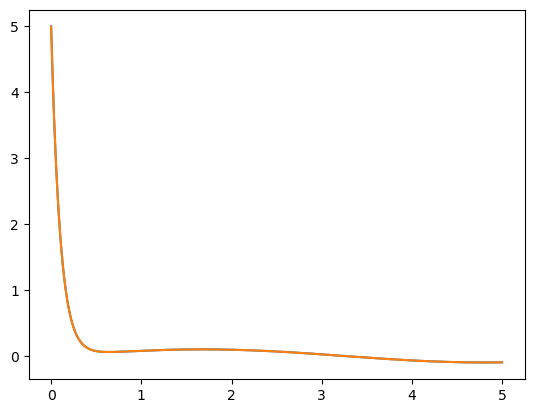

In [47]:
y,x = ETDRK4(T,h,u_0)

plt.plot(x,y)
plt.plot(x,U_true(x,5))
plt.show

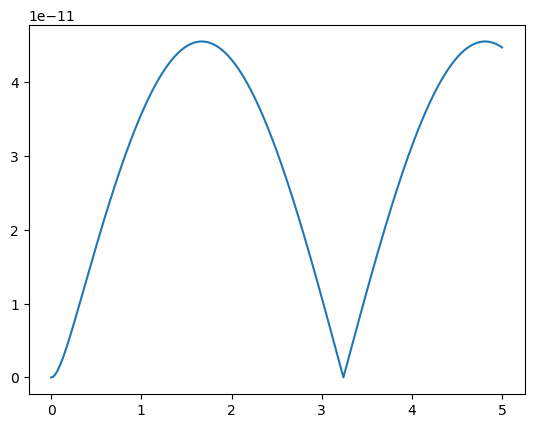

In [48]:
plt.plot(x,np.abs(y - U_true(x,5)))

In [49]:
errorN = 5


Test_H = np.zeros(errorN)

for i in range(0,errorN):
    Test_H[i] = 10**(-i/2)

C:\Users\gaffe\AppData\Local\Temp\ipykernel_3876\1405894896.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0, 0.5, 'error from true soln')

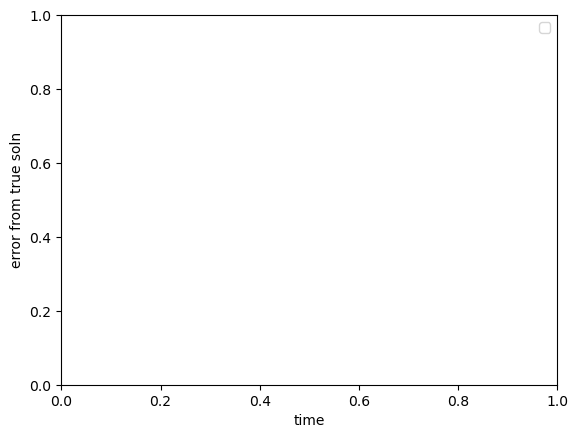

In [ ]:
Error_Vec1 = np.zeros(errorN)

for i in range(0, errorN):
    (y1,x) = ETDRK4(T, Test_H[i], u_0)
    yTrue = U_true(x,u_0)
    
    #if i == 6:
    #    plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
    #elif i == 12:
    #    plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
    Error_Vec1[i] = np.linalg.norm(y1-yTrue)
#plt.legend()
#plt.xlabel("time")
#plt.ylabel("error from true soln")

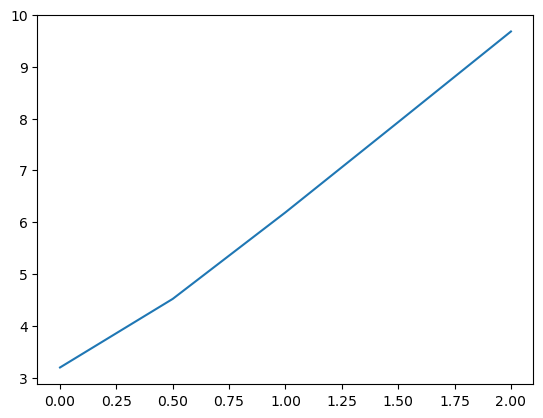

In [51]:
plt.plot(-np.log10(Test_H), -np.log10(Error_Vec1))